In [87]:
import networkx as nx # great library that implements a lot of useful (and efficient) data structures and algorithms for graphs
import numpy as np
import gym
import matplotlib.pyplot as plt


class State(object):
    '''
    Depict the state as a graph of all the pixels which can be crossed at any time
    by Pacman. in order to be a node, a pixel needs to lie in a corridor. Each different pixel
    can be connected to any of the four Von Neumann neighbors (up, right, down, left), provided 
    they are admissible. The NetworkX library is used.
    '''
    def __init__(self):
        '''
        Initializes the empty graph
        '''
        self.graph = nx.Graph() # NetworkX-provided data structure to represent a graph
        self.map = None # To be the matrix representation of the graph
        
    def create_graph(self, rails_map, corridors_color):
        '''
        Initializes the graph. It loop over every corridor pixel over the rails_map matrix and adds 
        its corresponding node. For each new node, the presence of neighbors is checked, and they are 
        eventually added. Finally, those pixel who are not
        '''
        m, n = np.shape(rails_map)
        
        # Loop over all pixels
        for row in range(m):
            for col in range(n):
                color = rails_map[row, col]
                if (color == corridors_color) and ((row, col) not in self.graph.nodes): # if corridor
                    self.graph.add_node((row, col)) #add node to the graph
                    
                    # Loop over the neighbors and establish edge if necessary
                    for offset in [(0, 1), (0, -1), (-1, 0), (1, 0)]:
                        neighbor = (row + offset[0], col + offset[1])
                        
                        if (0 <= neighbor[0] <= m-1) \
                        and (0 <= neighbor[1] <= n-1) \
                        and (rails_map[neighbor[0], neighbor[1]] == corridors_color): # if not out of bounds and colored appropriately
                            self.graph.add_edge((row, col), neighbor)
                
        # Generate map 
        self.map = np.ones(rails_map.shape).astype(int) * int(not corridors_color)
        for pixel in self.graph.nodes:
            self.map[pixel[0], pixel[1]] = corridors_color
                
      
    def get_distance(self, source, target):
        '''
        Computes the shortest distance from source to target.
        Source is likely to be Pacman, while targets can be the ghosts for example.
        '''
        return nx.shortest_path_length(self.graph, source, target)
    
    def display_map(self):
        plt.imshow(self.map)
        plt.show()
        
    
    def display_path(self, source, target, path_color=3):
        '''
        Input source and target and this function will display the shortest path.
        Used for testing.
        '''
        if (source not in self.graph.nodes) or (target not in self.graph.nodes):
            print("One or more of the locations cannot be crossed")
            return
        
        path = nx.shortest_path(self.graph, source, target)
        display = self.map.copy()
        
        for pixel in path:
            display[pixel[0], pixel[1]] = path_color
            
        plt.imshow(display)
        plt.show()

[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


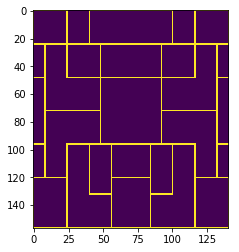

In [89]:
rail_map = np.load("saved_objects/rails_matrix.npy").astype(int)
print(rail_map[:10, :10]) # the corridors have the value 1, the walls have 0

plt.imshow(rail_map)
plt.show()

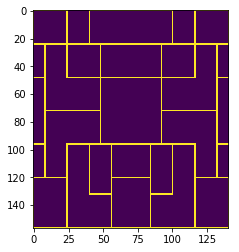

This graph contains 1686 nodes.


In [90]:
test = State()
test.create_graph(rail_map, corridors_color=1)
test.display_map()

nodes_number = len(test.graph.nodes)
print("This graph contains {} nodes.".format(nodes_number))

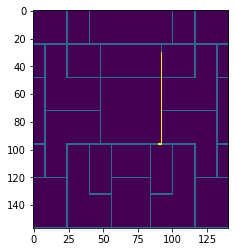

The distance from (30, 92) to (96, 90) is: 68


In [91]:
# Find and display the shortest path between two random nodes

starting_point = tuple(np.asarray(test.graph.nodes)[np.random.randint(nodes_number)])
target_point = tuple(np.asarray(test.graph.nodes)[np.random.randint(nodes_number)])

distance = test.get_distance(starting_point, target_point)

test.display_path(starting_point, target_point)
print("The distance from {} to {} is: {}" \
      .format(starting_point, target_point, distance))